In [32]:
import pandas as pd
import glob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
file_path = r'C:\Users\Admin\OneDrive\Desktop\car_dheko\Car_Dheko\*.csv'
csv_files = glob.glob(file_path )

dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df.drop(columns=["Unnamed: 0","Rear Brake Type"],axis=1,inplace=True)

Outlier detection

In [34]:
def outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    whisker1 = q1 - 1.5 * IQR
    whisker2 = q3 + 1.5 * IQR
    return whisker1, whisker2

for column in df.select_dtypes(include=['number']).columns:
    whisker1, whisker2 = outlier(dd, column)
    df = df[(df[column] >= whisker1) & (df[column] <= whisker2)]


Encoding

In [35]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()  
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

In [36]:
df.head(4)

,state,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,Wheel Base,Kerb Weight,Gear Box,Drive Type,Steering Type,Turning Radius,Front Brake Type,Tyre Type,No Door Numbers,Cargo Volumn
3,0,3,2,163,1,1,4,29,2014,1867,...,2425,94,5,3,4,4.7,3,11,4,355
4,0,1,1,773,1,1,7,41,2015,4277,...,2600,119,4,2,4,5.0,5,11,5,355
8,0,3,2,377,0,1,7,37,2018,6555,...,2650,63,0,2,4,5.4,5,10,4,355
10,0,3,0,587,1,1,7,36,2018,3962,...,2520,169,4,2,4,5.0,2,11,5,355


Future Engineering

C:\Users\Admin\AppData\Local\Temp\ipykernel_30484\3854546557.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


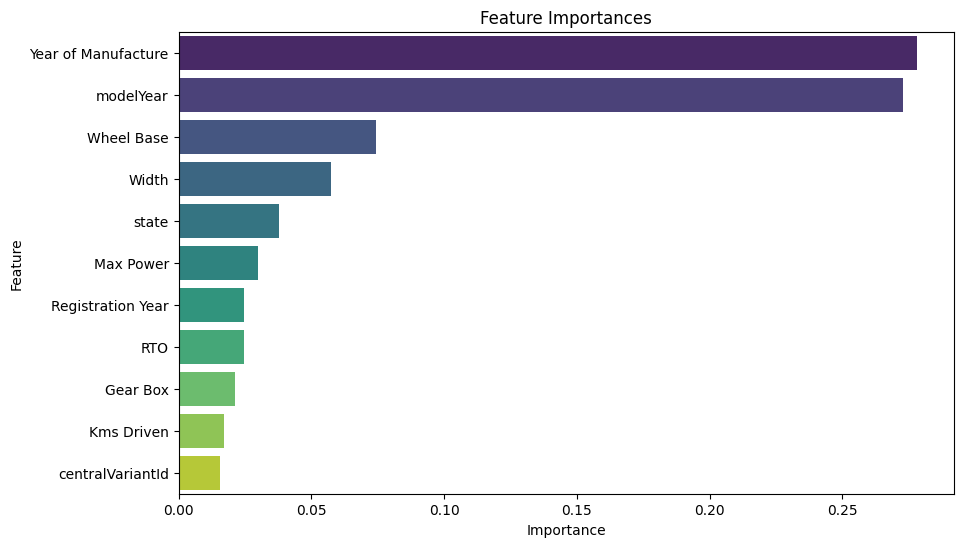

In [37]:
X = df.drop(columns=["price"])
y= df["price"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42,shuffle=True)

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred_y=model.predict(x_test)
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(11)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

Top 10 Features

In [38]:
Features=["modelYear",'Year of Manufacture','Wheel Base','Width','state','Max Power',
          'RTO','Registration Year','Gear Box','centralVariantId',"price"]
